In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [50]:
df = pd.read_csv('/content/Zillow.csv')
df.head()


,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,isZillowOwned,variableData,badgeInfo,pgapt,sgapt,zestimate,info3String,brokerName
0,445000,445000,"8916 Mountain Shadows Cv APT B, Austin, TX 78735",8916 Mountain Shadows Cv APT B,Austin,TX,78735,3.0,3.0,1802.0,30.269207,-97.86206,False,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",NaN,ForSale,For Sale (Broker),1189900,https://photos.zillowstatic.com/fp/98ab7c7b289...,Realty Austin
1,1995000,1995000,"1701 Alguno Rd, Austin, TX 78757",1701 Alguno Rd,Austin,TX,78757,4.0,4.0,3443.0,30.333755,-97.73414,False,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",NaN,ForSale,New Construction,2154600,https://photos.zillowstatic.com/fp/98ab7c7b289...,Jimmy Gilmore & Co
2,929900,929900,"1800 Kinney Ave, Austin, TX 78704",1800 Kinney Ave,Austin,TX,78704,2.0,2.0,1318.0,30.252070,-97.76860,False,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",NaN,ForSale,For Sale (Broker),1048700,https://photos.zillowstatic.com/fp/98ab7c7b289...,Keller Williams Realty
3,6495000,6495000,"2407 Pemberton Pl, Austin, TX 78703",2407 Pemberton Pl,Austin,TX,78703,5.0,6.0,5000.0,30.290514,-97.75361,False,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",NaN,ForSale,For Sale (Broker),6553400,https://photos.zillowstatic.com/fp/98ab7c7b289...,Douglas Elliman Real Estate
4,365000,365000,"11701 Lansdowne Rd, Austin, TX 78754",11701 Lansdowne Rd,Austin,TX,78754,4.0,2.0,2127.0,30.355240,-97.61292,False,"{'type': '3D_HOME', 'text': '3D Tour'}",NaN,ForSale,For Sale (Broker),421000,https://photos.zillowstatic.com/fp/98ab7c7b289...,Orchard Brokerage


In [51]:
df.shape



(800, 20)

In [52]:
to_remove = []
for col in df.columns:

	# Removing columns having only one value.
	if df[col].nunique() == 1:
		to_remove.append(col)

	# Removing columns with more than 90% of the
	# rows as null values.
	elif (df[col].isnull()).mean() > 0.60:
		to_remove.append(col)

print(len(to_remove))


4


In [53]:
df.drop(to_remove,
		axis=1,
		inplace=True)


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             800 non-null    int64  
 1   unformattedPrice  800 non-null    int64  
 2   address           800 non-null    object 
 3   addressStreet     800 non-null    object 
 4   addressCity       800 non-null    object 
 5   addressZipcode    800 non-null    int64  
 6   beds              785 non-null    float64
 7   baths             799 non-null    float64
 8   area              796 non-null    float64
 9   latitude          786 non-null    float64
 10  longitude         786 non-null    float64
 11  variableData      800 non-null    object 
 12  sgapt             800 non-null    object 
 13  zestimate         800 non-null    int64  
 14  info3String       760 non-null    object 
 15  brokerName        792 non-null    object 
dtypes: float64(5), int64(4), object(7)
memory us

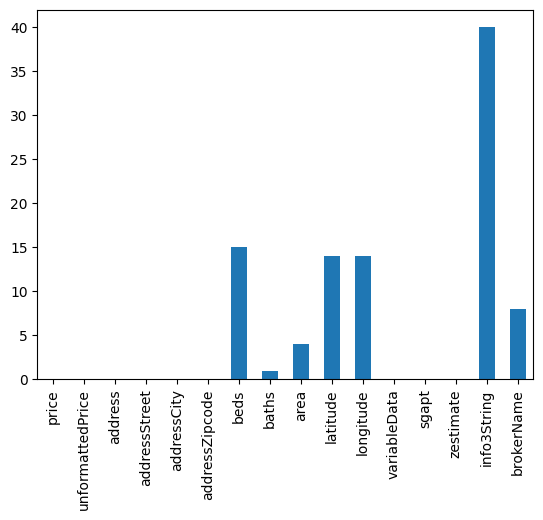

In [55]:
df.isnull().sum().plot.bar()
plt.show()


In [56]:

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = df[col].fillna(df[col].mode()[0])
	elif df[col].dtype == np.number:
		df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

In [57]:
ints, objects, floats = [], [], []

for col in df.columns:
	if df[col].dtype == float:
		floats.append(col)
	elif df[col].dtype == int:
		ints.append(col)
	else:
		objects.append(col)

len(ints), len(floats), len(objects)


(4, 5, 7)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             800 non-null    int64  
 1   unformattedPrice  800 non-null    int64  
 2   address           800 non-null    object 
 3   addressStreet     800 non-null    object 
 4   addressCity       800 non-null    object 
 5   addressZipcode    800 non-null    int64  
 6   beds              800 non-null    float64
 7   baths             800 non-null    float64
 8   area              800 non-null    float64
 9   latitude          800 non-null    float64
 10  longitude         800 non-null    float64
 11  variableData      800 non-null    object 
 12  sgapt             800 non-null    object 
 13  zestimate         800 non-null    int64  
 14  info3String       800 non-null    object 
 15  brokerName        800 non-null    object 
dtypes: float64(5), int64(4), object(7)
memory us

In [59]:
for col in objects:
	print(col, ' -> ', df[col].nunique())
	print(df[col].unique())
	print()


address  ->  800
['8916 Mountain Shadows Cv APT B, Austin, TX 78735'
 '1701 Alguno Rd, Austin, TX 78757' '1800 Kinney Ave, Austin, TX 78704'
 '2407 Pemberton Pl, Austin, TX 78703'
 '11701 Lansdowne Rd, Austin, TX 78754' '2507 Willow St, Austin, TX 78702'
 '6305 Roseborough Dr, Austin, TX 78747'
 '3102 Tom Green St, Austin, TX 78705' '1917 Teagle Dr, Austin, TX 78741'
 '5807 Wagon Train Rd, Austin, TX 78749'
 '11212 Liberty Farms Dr, Austin, TX 78754'
 '12400 Britannic Dr, Austin, TX 78753'
 '8803 Colonial Dr, Austin, TX 78758'
 '1101 Turtle Creek Blvd, Austin, TX 78745'
 '5820 Harper Park Dr UNIT 11, Austin, TX 78735'
 '12712 Coralberry Cv, Austin, TX 78732'
 '8105 Almondsbury Ln, Austin, TX 78748'
 '2101 Crazyhorse Pass, Austin, TX 78734'
 '2300 Vanderbilt Cir, Austin, TX 78723'
 '7124 Dancing Wind Ln, Del Valle, TX 78617'
 '11009 Daly Cv, Austin, TX 78747' '4611 Saloma Pl, Austin, TX 78749'
 '11314 James Haller Dr, Austin, TX 78748'
 '6817 Hartlage St, Austin, TX 78754'
 '9000 Berryl

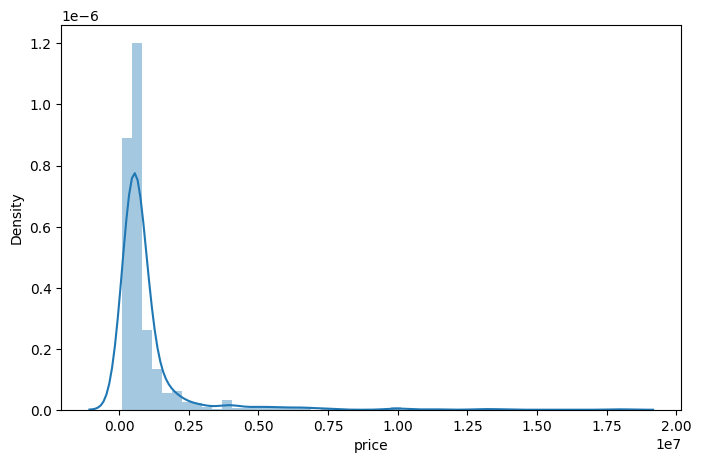

In [60]:
plt.figure(figsize=(8, 5))
sb.distplot(df['price'])
plt.show()


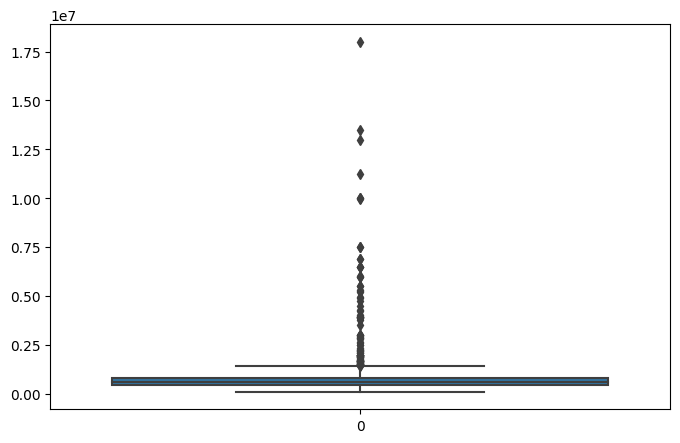

In [61]:
plt.figure(figsize=(8, 5))
sb.boxplot(df['price'])
plt.show()


In [62]:
"""print('Shape of the dataframe before removal of outliers', df.shape)
df = df[(df['price'] > -1) & (df['price'] < 1)]
print('Shape of the dataframe after removal of outliers ', df.shape) """
#outliers where removing entire datasets so prefer to go by IQR method to remove outliers

"print('Shape of the dataframe before removal of outliers', df.shape) \ndf = df[(df['price'] > -1) & (df['price'] < 1)] \nprint('Shape of the dataframe after removal of outliers ', df.shape) "

In [63]:
for col in objects:
	le = LabelEncoder()
	df[col] = le.fit_transform(df[col])


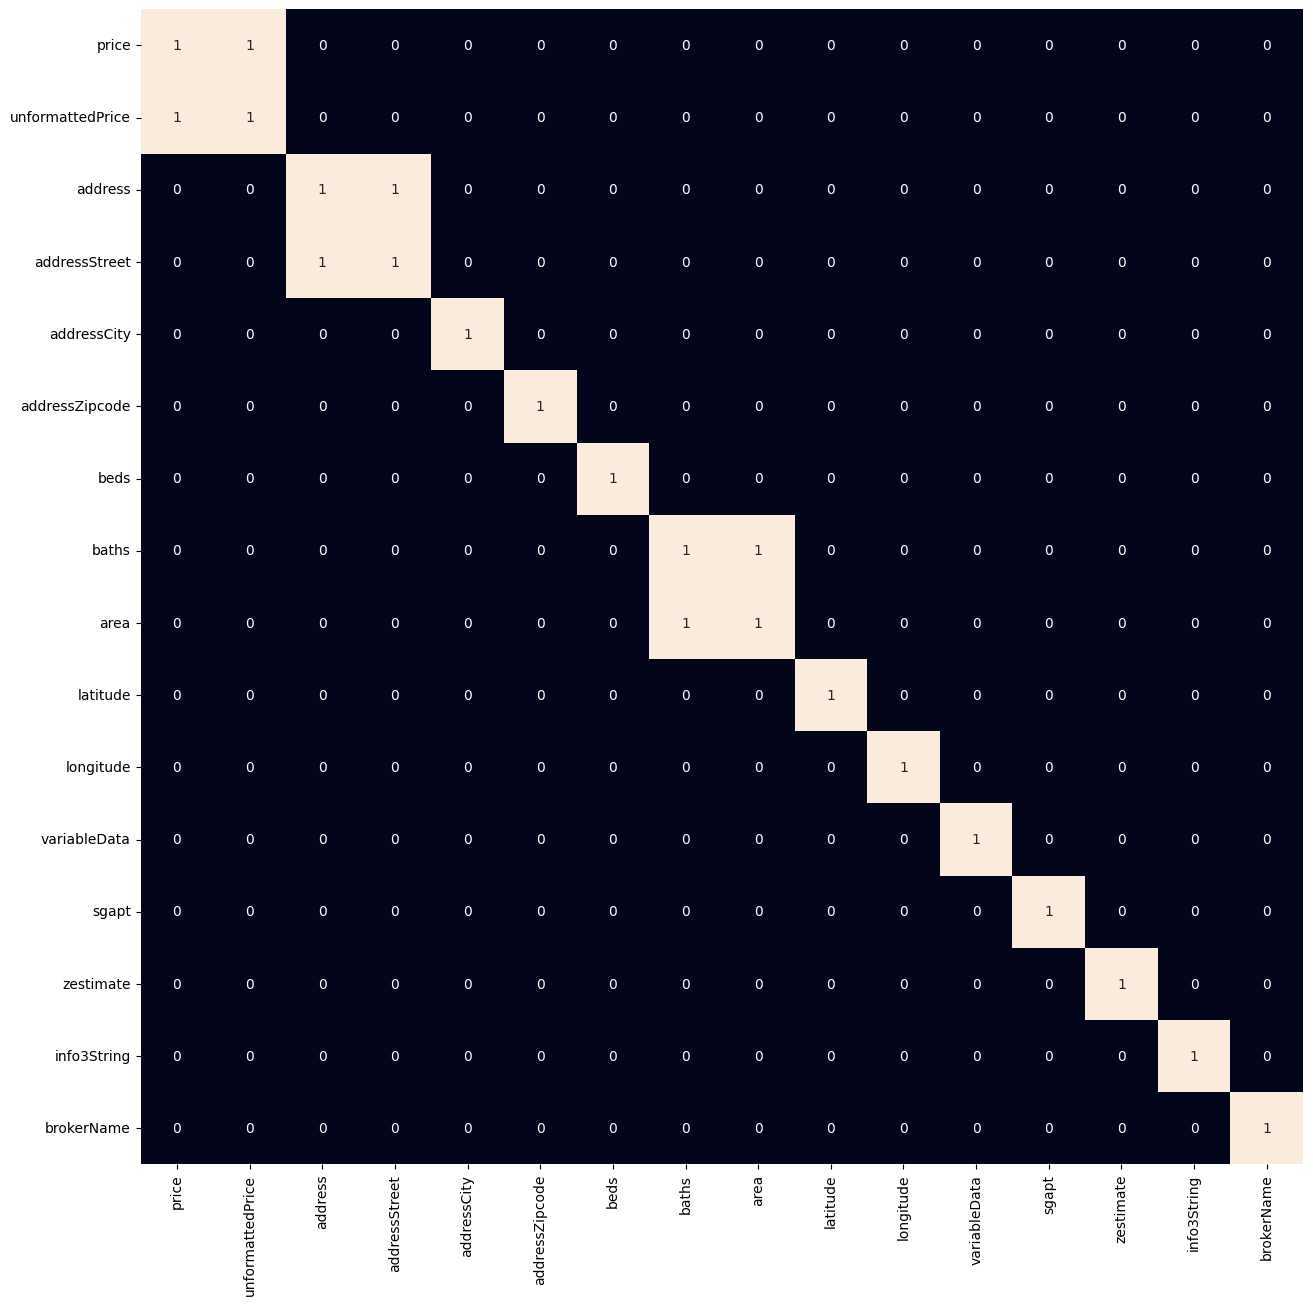

In [64]:
from ssl import ALERT_DESCRIPTION_BAD_CERTIFICATE_STATUS_RESPONSE
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [65]:
to_remove = ['unformattedPrice', 'addressStreet', 'baths']
df.drop(to_remove, axis=1, inplace=True)

In [66]:
df

,price,address,addressCity,addressZipcode,beds,area,latitude,longitude,variableData,sgapt,zestimate,info3String,brokerName
0,445000,746,0,78735,3.0,1802.0,30.269207,-97.862060,183,0,1189900,1,172
1,1995000,242,0,78757,4.0,3443.0,30.333755,-97.734140,18,1,2154600,1,97
2,929900,257,0,78704,2.0,1318.0,30.252070,-97.768600,78,0,1048700,1,103
3,6495000,331,0,78703,5.0,5000.0,30.290514,-97.753610,325,0,6553400,1,60
4,365000,98,0,78754,4.0,2127.0,30.355240,-97.612920,0,0,421000,1,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9990000,118,0,78733,5.0,8357.0,30.326190,-97.844025,58,0,0,1,136
796,11250800,415,0,78746,5.0,7947.0,30.293275,-97.764621,55,1,0,1,136
797,13000000,155,0,78703,5.0,6528.0,30.299100,-97.749725,37,0,0,1,46
798,13500000,693,0,78735,5.0,8549.0,30.271202,-97.867645,95,0,0,1,136


In [67]:
features = df.drop(['price'], axis=1)
target = df['price'].values

X_train, X_val,Y_train, Y_val = train_test_split(features, target,
									test_size=0.1,
									random_state=22)
X_train.shape, X_val.shape


((720, 12), (80, 12))

In [68]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [69]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
		Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  504373.5411832306
Validation Error :  399103.62977603

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  8811.670128038195
Validation Error :  201277.8509033203

Lasso() : 
Training Error :  504372.84216277895
Validation Error :  399102.74087